# Visualize Evidence Channels

This notebook provides visualizations and analysis of quantum evidence channels used in the Bayesian learner.

## Overview

We visualize:
1. Kraus operator structure for different stimuli
2. Damping parameter vs stimulus features
3. Channel action on basis states (Bloch sphere)
4. Evolution of quantum states through multiple channel applications
5. Channel stability and CPTP verification


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_state_city

# Import project modules
import sys
sys.path.insert(0, '..')
from src.channels import evidence_kraus, apply_channel_to_density_matrix, compute_strength_from_stimulus

plt.style.use('default')
np.set_printoptions(precision=4, suppress=True)


## 1. Visualize Kraus Operators

For various stimuli, extract and visualize the Kraus operators K0 and K1 as heatmaps.


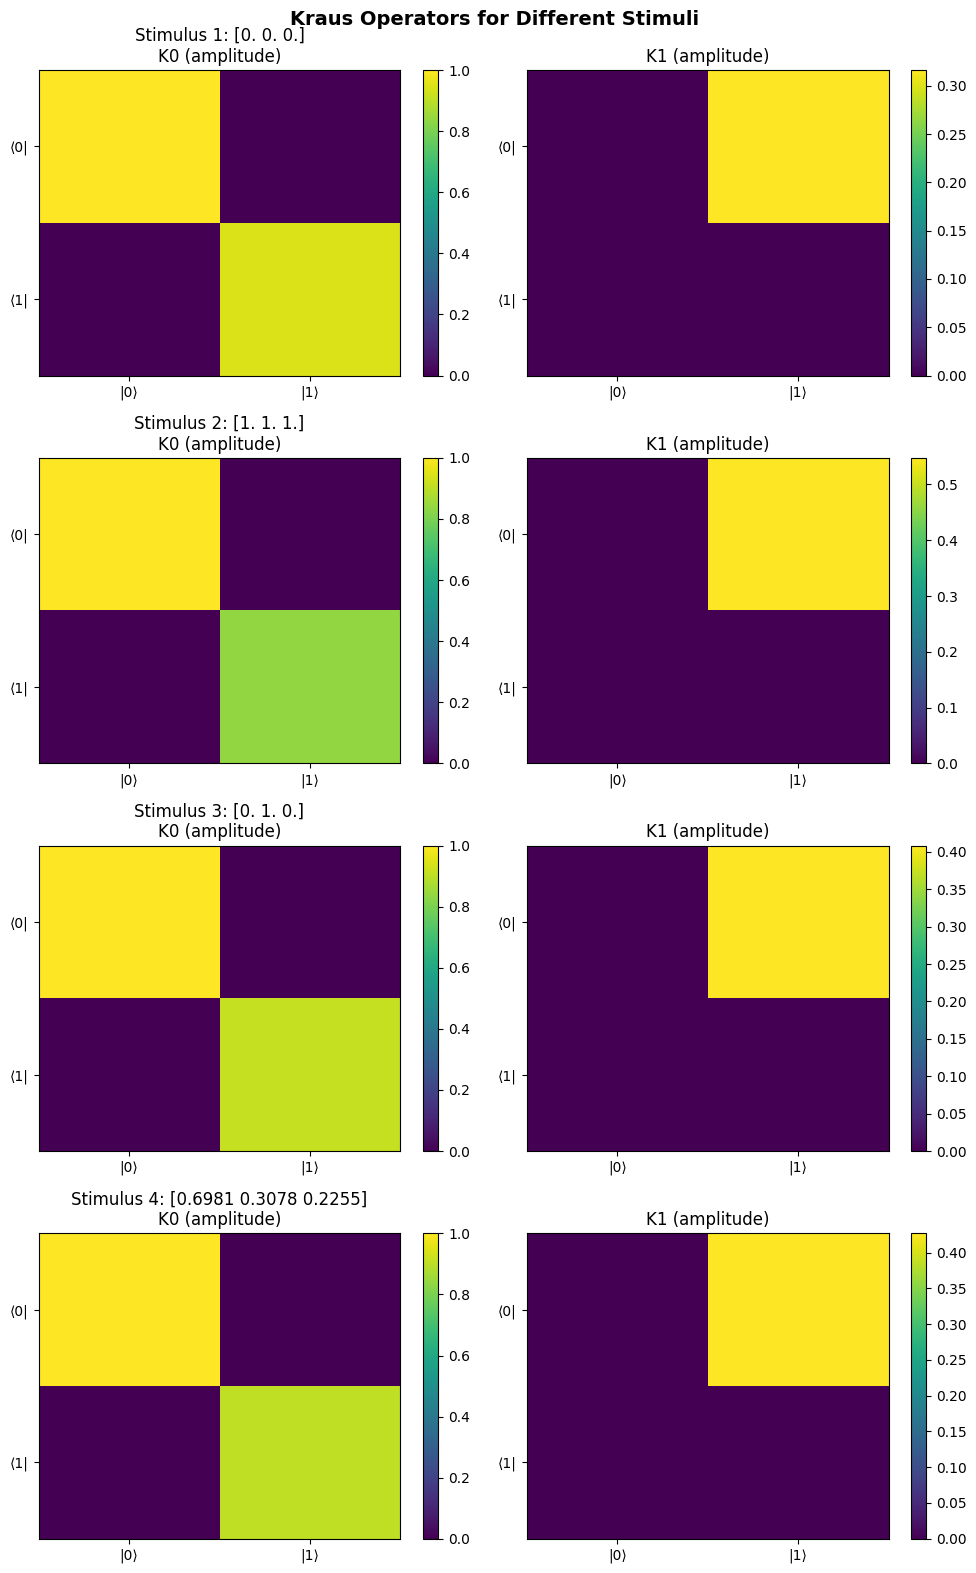

Kraus operator visualization complete!


In [2]:
# Test stimuli
stimuli = [
    np.array([0.0, 0.0, 0.0]),
    np.array([1.0, 1.0, 1.0]),
    np.array([0.0, 1.0, 0.0]),
    np.random.rand(3),  # Random stimulus
]

fig, axes = plt.subplots(len(stimuli), 2, figsize=(10, 4*len(stimuli)))
fig.suptitle('Kraus Operators for Different Stimuli', fontsize=14, fontweight='bold')

for i, x in enumerate(stimuli):
    # Build channel
    channel = evidence_kraus(x, strength=0.4)
    kraus_ops = channel.data
    
    # Extract K0 and K1
    K0 = kraus_ops[0]
    K1 = kraus_ops[1] if len(kraus_ops) > 1 else np.zeros_like(K0)
    
    # Plot K0
    im0 = axes[i, 0].imshow(np.abs(K0), cmap='viridis', aspect='auto')
    axes[i, 0].set_title(f'Stimulus {i+1}: {x}\nK0 (amplitude)')
    axes[i, 0].set_xticks([0, 1])
    axes[i, 0].set_yticks([0, 1])
    axes[i, 0].set_xticklabels(['|0⟩', '|1⟩'])
    axes[i, 0].set_yticklabels(['⟨0|', '⟨1|'])
    plt.colorbar(im0, ax=axes[i, 0])
    
    # Plot K1
    im1 = axes[i, 1].imshow(np.abs(K1), cmap='viridis', aspect='auto')
    axes[i, 1].set_title(f'K1 (amplitude)')
    axes[i, 1].set_xticks([0, 1])
    axes[i, 1].set_yticks([0, 1])
    axes[i, 1].set_xticklabels(['|0⟩', '|1⟩'])
    axes[i, 1].set_yticklabels(['⟨0|', '⟨1|'])
    plt.colorbar(im1, ax=axes[i, 1])

plt.tight_layout()
plt.show()

print("Kraus operator visualization complete!")


## 2. Damping Parameter vs Stimulus

Compute the damping parameter p for many random stimuli and visualize the relationship.


In [ ]:
# Generate random stimuli
n_samples = 100
np.random.seed(42)
random_stimuli = np.random.rand(n_samples, 3)

# Compute damping parameters
damping_params = []
for x in random_stimuli:
    strength = compute_strength_from_stimulus(x, strength_max=0.4)
    damping_params.append(strength)

damping_params = np.array(damping_params)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Damping vs each feature
for i in range(3):
    ax = axes[i // 2, i % 2]
    ax.scatter(random_stimuli[:, i], damping_params, alpha=0.6, s=50)
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('Damping Parameter p')
    ax.set_title(f'Damping vs Feature {i+1}')
    ax.grid(True, alpha=0.3)

# Histogram of damping parameters
ax = axes[1, 1]
ax.hist(damping_params, bins=20, edgecolor='black', alpha=0.7)
ax.set_xlabel('Damping Parameter p')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Damping Parameters')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Damping parameter statistics:")
print(f"  Mean: {damping_params.mean():.4f}")
print(f"  Std: {damping_params.std():.4f}")
print(f"  Min: {damping_params.min():.4f}")
print(f"  Max: {damping_params.max():.4f}")


TypeError: compute_strength_from_stimulus() got an unexpected keyword argument 'max_strength'

## 3. Channel Action on Basis States

Apply the evidence channel to |0⟩ and |1⟩ and visualize on the Bloch sphere.


In [ ]:
# Test stimulus
x = np.array([0.5, 0.5, 0.5])
channel = evidence_kraus(x, strength=0.4)

# Create basis states
state_0 = DensityMatrix.from_label('0')
state_1 = DensityMatrix.from_label('1')

# Apply channel
state_0_updated = apply_channel_to_density_matrix(state_0, channel)
state_1_updated = apply_channel_to_density_matrix(state_1, channel)

# Visualize on Bloch sphere
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# |0⟩ before and after
plot_bloch_multivector(state_0.data, title='|0⟩ Before Channel', ax=axes[0])
plot_bloch_multivector(state_0_updated.data, title='|0⟩ After Channel', ax=axes[1])

plt.tight_layout()
plt.show()

# Print state information
print("State |0⟩:")
print(f"  Before: {state_0.data}")
print(f"  After: {state_0_updated.data}")
print(f"  Trace before: {np.trace(state_0.data):.6f}")
print(f"  Trace after: {np.trace(state_0_updated.data):.6f}")

print("\nState |1⟩:")
print(f"  Before: {state_1.data}")
print(f"  After: {state_1_updated.data}")
print(f"  Trace before: {np.trace(state_1.data):.6f}")
print(f"  Trace after: {np.trace(state_1_updated.data):.6f}")


## 4. Evolution Visualization

Apply multiple channels sequentially to an initial state and track the evolution.


In [ ]:
# Create sequence of stimuli
np.random.seed(42)
n_updates = 10
stimuli_sequence = np.random.rand(n_updates, 3)

# Initial state (maximally mixed)
rho = DensityMatrix.from_label('+')  # |+⟩ state
target_state = DensityMatrix.from_label('0')  # Target: |0⟩

# Track evolution
states = [rho]
trace_distances = []

for i, x in enumerate(stimuli_sequence):
    # Apply channel
    channel = evidence_kraus(x, strength=0.4)
    rho = apply_channel_to_density_matrix(rho, channel)
    states.append(rho)
    
    # Compute trace distance to target
    diff = rho.data - target_state.data
    trace_dist = 0.5 * np.trace(np.abs(diff))
    trace_distances.append(trace_dist)

# Plot evolution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Trace distance over time
axes[0].plot(range(1, n_updates + 1), trace_distances, 'o-', linewidth=2, markersize=8)
axes[0].set_xlabel('Update Step')
axes[0].set_ylabel('Trace Distance to |0⟩')
axes[0].set_title('State Evolution: Trace Distance')
axes[0].grid(True, alpha=0.3)

# State purity over time
purities = [np.trace(state.data @ state.data).real for state in states]
axes[1].plot(range(len(purities)), purities, 'o-', linewidth=2, markersize=8)
axes[1].set_xlabel('Update Step')
axes[1].set_ylabel('Purity')
axes[1].set_title('State Evolution: Purity')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial trace distance: {trace_distances[0]:.4f}")
print(f"Final trace distance: {trace_distances[-1]:.4f}")
print(f"Initial purity: {purities[0]:.4f}")
print(f"Final purity: {purities[-1]:.4f}")


## 5. Channel Stability Tests

Verify CPTP completeness condition: K0†K0 + K1†K1 = I for various stimuli.


In [ ]:
# Generate many random stimuli
n_test = 100
np.random.seed(42)
test_stimuli = np.random.rand(n_test, 3)

# Compute CPTP completeness errors
errors = []
identity = np.eye(2, dtype=complex)

for x in test_stimuli:
    channel = evidence_kraus(x, strength=0.4)
    kraus_ops = channel.data
    
    # Compute completeness: Σ_k K_k† K_k
    completeness = sum(K.conj().T @ K for K in kraus_ops)
    
    # Compute error
    error = np.linalg.norm(completeness - identity, ord='fro')
    errors.append(error)

errors = np.array(errors)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Error distribution
axes[0].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Frobenius Norm of (ΣK†K - I)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('CPTP Completeness Error Distribution')
axes[0].axvline(1e-10, color='red', linestyle='--', label='Threshold (1e-10)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Error vs stimulus features
for i in range(3):
    axes[1].scatter(test_stimuli[:, i], errors, alpha=0.5, s=30, label=f'Feature {i+1}')

axes[1].set_xlabel('Feature Value')
axes[1].set_ylabel('CPTP Error')
axes[1].set_title('CPTP Error vs Stimulus Features')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("CPTP Completeness Statistics:")
print(f"  Mean error: {errors.mean():.2e}")
print(f"  Max error: {errors.max():.2e}")
print(f"  Min error: {errors.min():.2e}")
print(f"  All errors < 1e-10: {np.all(errors < 1e-10)}")
print(f"  All errors < 1e-8: {np.all(errors < 1e-8)}")
